# Regressão Linear - Projeto

Parabéns! Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você para ajudá-los a descobrir isso! Vamos começar!

Basta seguir as etapas abaixo para analisar os dados do cliente (é falso, não se preocupe, eu não lhe dei números reais de cartões de crédito ou e-mails).

## Imports
** Importe pandas, numpy, matplotlib,e seaborn. Em seguida, configure% matplotlib inline
(Você importará sklearn conforme você precisar). **

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

** Leia no arquivo csv do Ecommerce Customers como um DataFrame chamado clientes. **

In [3]:
clientes = pd.read_csv("/content/drive/Shareddrives/IFSC/IML/P4. Regressão Linear/Ecommerce Customers")

** Verifique o cabeçalho dos clientes e confira os seus métodos info () e describe(). **

In [4]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análise de dados exploratória

** Vamos explorar os dados! **

Pelo resto do exercício, só estaremos usando os dados numéricos do arquivo csv.
___
** Use seaborn para criar um jointplot para comparar as colunas Time On Website e Volume anual. A correlação faz sentido? **

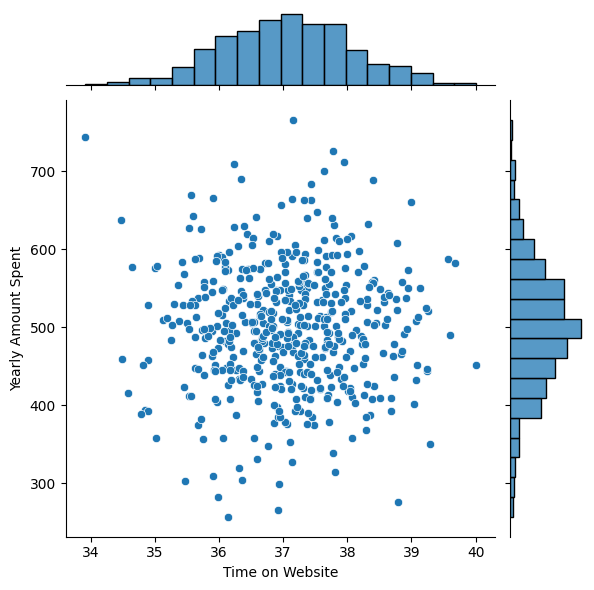

In [ ]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

** Faça o mesmo, mas com a coluna tempo no aplicativo (Time on App), em vez disso. **

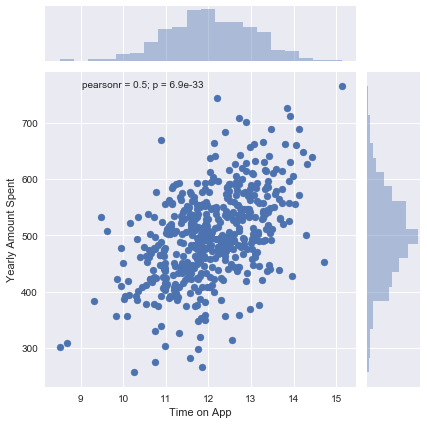

In [ ]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

** Use jointplot criar um lote de caixa hexagonal 2D que compara tempo no aplicativo (Time on App) e o tempo da associação (Length of Membership). **

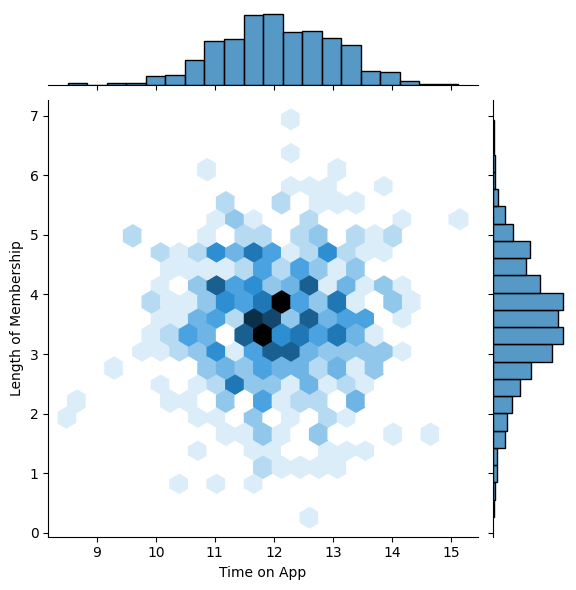

In [ ]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')

** Vamos explorar esses tipos de relações em todo o conjunto de dados. Use [parplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recriar o gráfico abaixo. (Não se preocupe com as cores) **

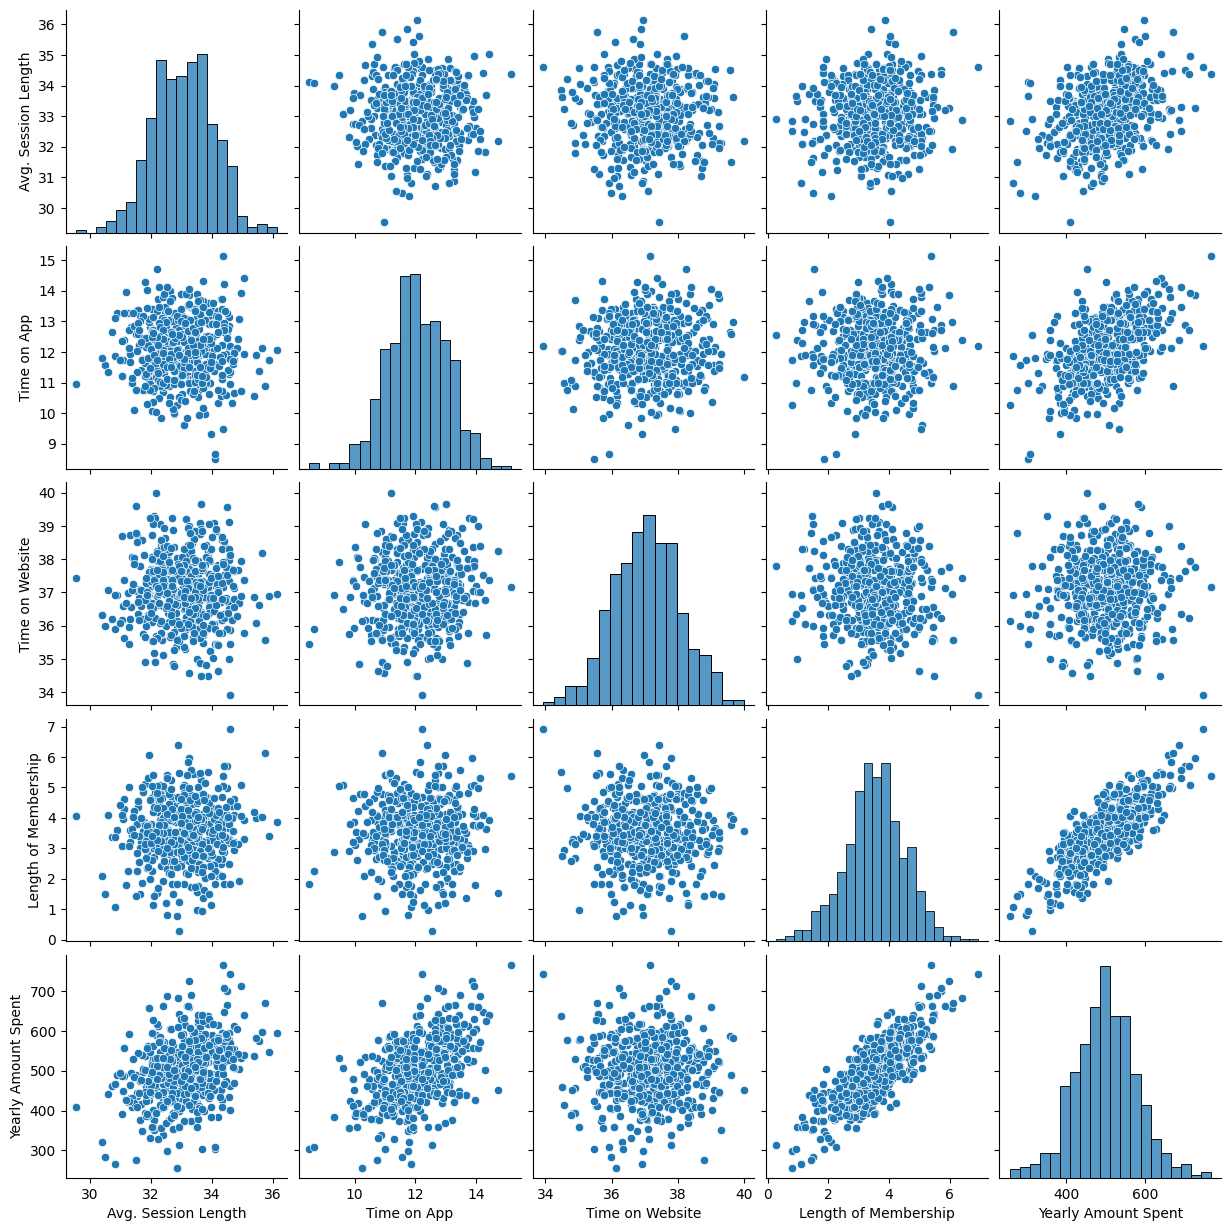

In [ ]:
sns.pairplot(clientes)

** Baseado neste plot o que parece ser a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent)? **

** Crie um plot de um modelo linear (usando o lmplot de Seaborn) da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership). **

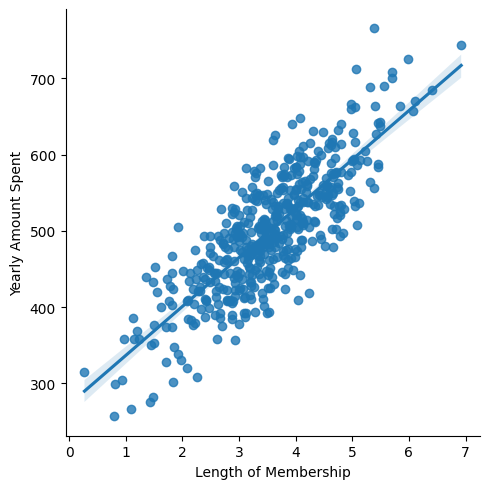

In [ ]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.
** Defina uma variável X igual a todas as características numéricas dos clientes e uma variável y igual à coluna Valor anual gasto (Yearly Amount Spent). **

In [6]:
y = clientes['Yearly Amount Spent']

In [7]:
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [8]:
X= clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [10]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X

array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735],
       [-0.05272322, -0.72713923,  0.04968115,  0.5720669 ],
       ...,
       [-0.40987204, -0.55685385,  1.26018697,  1.42726105],
       [ 0.27159708,  0.34124841, -0.21829075, -1.19904197],
       [ 0.66842216,  0.36882066, -1.27732288, -0.79967926]])

** Use model_selection.train_test_split da sklearn para dividir os dados em conjuntos de treinamento e teste. Defina test_size = 0.3 e random_state = 101 **

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train,y_test =train_test_split(X, y, test_size=0.3,random_state=101)

In [13]:
X_test.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

** Importe LinearRegression do sklearn.linear_model **

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

** Crie uma instância de um modelo LinearRegression () chamado lm. **

In [25]:
lm = LinearRegression()


In [15]:
mlp = MLPRegressor(hidden_layer_sizes=[50, 20], max_iter=10000, verbose=True, tol=0.000001, alpha=0.001)

** Treine lm nos dados de treinamento. **

In [26]:
lm.fit(X_train, y_train)


LinearRegression()

In [16]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 127176.71295056
Iteration 2, loss = 127142.41345817
Iteration 3, loss = 127108.37649939
Iteration 4, loss = 127072.63331472
Iteration 5, loss = 127037.72802349
Iteration 6, loss = 127002.13864154
Iteration 7, loss = 126965.67372646
Iteration 8, loss = 126928.96754728
Iteration 9, loss = 126891.53563728
Iteration 10, loss = 126852.71931650
Iteration 11, loss = 126813.64115862
Iteration 12, loss = 126772.69138323
Iteration 13, loss = 126731.35173694
Iteration 14, loss = 126689.14674576
Iteration 15, loss = 126646.00717514
Iteration 16, loss = 126601.24981049
Iteration 17, loss = 126555.63269832
Iteration 18, loss = 126508.74468691
Iteration 19, loss = 126460.93531742
Iteration 20, loss = 126411.25880435
Iteration 21, loss = 126360.16744174
Iteration 22, loss = 126307.22679790
Iteration 23, loss = 126253.22529168
Iteration 24, loss = 126197.06699594
Iteration 25, loss = 126138.80865463
Iteration 26, loss = 126078.25721353
Iteration 27, loss = 126016.76555979
Iteration 

MLPRegressor(alpha=0.001, hidden_layer_sizes=[50, 20], max_iter=10000,
             tol=1e-06, verbose=True)

**Print os coeficientes do modelo**

In [17]:
lm.coef_

NameError: name 'lm' is not defined

## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

** Use lm.predict () para prever o conjunto X_test dos dados. **

In [27]:
prediction = lm.predict(X_test)
prediction_mlp = mlp.predict(X_test)

** Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos. **

Text(0, 0.5, 'Predicted Y')

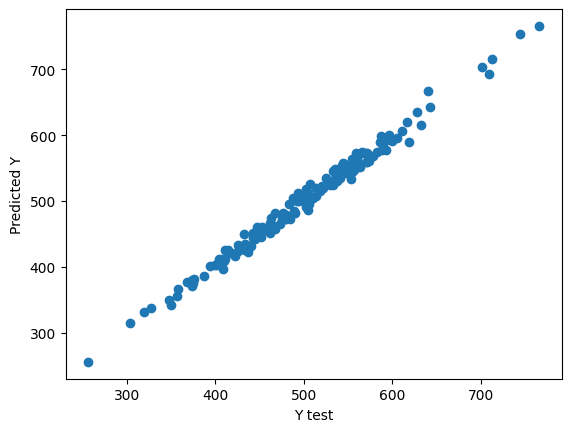

In [28]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

** Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas **

In [29]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2:', metrics.r2_score(y_test, prediction))

MAE: 7.228148653430832
MSE: 79.81305165097454
RMSE: 8.933815066978639
R2: 0.9890046246741234


In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction_mlp))
print('MSE:', metrics.mean_squared_error(y_test, prediction_mlp))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_mlp)))
print('R2:', metrics.r2_score(y_test, prediction_mlp))

MAE: 8.717090059790314
MSE: 123.29859497221865
RMSE: 11.103990047375703
R2: 0.9830138767929665


## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

** Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist (). **

<ipython-input-30-45e8191cf51e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction), bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

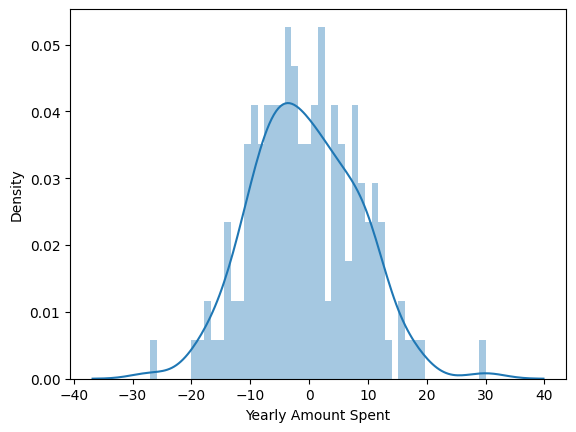

In [30]:
sns.distplot((y_test-prediction), bins=50)

In [ ]:
print('R2:', metrics.r2_score(y_test, prediction))

R2: 0.9890046246741234


## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

** Recrie o quadro de dados abaixo. **

In [32]:
lm.coef_

array([25.76252659, 38.32855202,  0.19220992, 61.17355707])

In [ ]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** Como você pode interpretar esses coeficientes? **

** Você acha que a empresa deve se concentrar mais em seu aplicativo móvel ou em seu site? **